### Importing Libraries and Loading the Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleaning

- Check the first few rows of the dataset to get an overview of the data
- Check for missing data
- Handle missing data (e.g., by filling or dropping rows with missing values).

In [2]:
df = pd.read_csv(r'C:\Users\Tuhin\Downloads\titanic-1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)

In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
#df.drop('Cabin', axis=1, inplace=True)

df.drop('Cabin', axis = 1 , inplace = True)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [11]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Step 3: Data Analysis

- Survival Rate: Calculate and visualize the overall survival rate.
- Passenger Class Analysis: Analyze the survival rates by passenger class.
- Gender Analysis: Analyze the survival rates by gender.
- Age Analysis: Analyze the survival rates by age groups.
- Fare Analysis: Analyze the fare distribution and its impact on survival.

In [15]:
#Survival Rate: Calculate and visualize the overall survival rate.

survival_rate = df['Survived'].mean()

print(f'Overall Survival rate: {survival_rate: .2%}')

Overall Survival rate:  38.38%


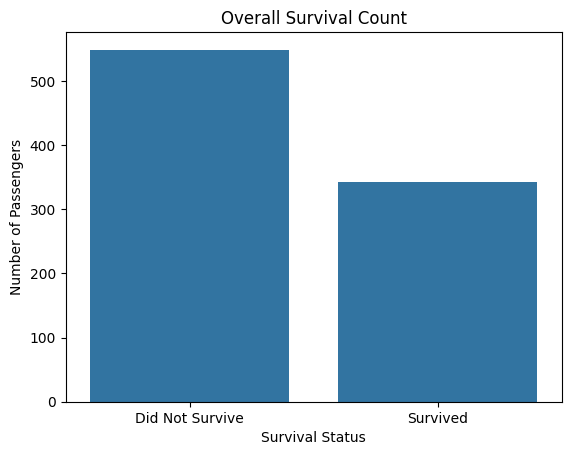

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.title('Overall Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()

- Passenger Class Analysis: Analyze the survival rates by passenger class.

In [17]:
survival_by_class = df.groupby('Pclass')['Survived'].agg(['count','sum','mean'])
survival_by_class.rename(columns = {
    'count' : 'Total',
    'sum' : 'survived',
    'mean' : 'survival rate'} , inplace = True)


survival_by_class['survival rate'] = (survival_by_class['survival rate'] * 100).round(2)
print(survival_by_class)


        Total  survived  survival rate
Pclass                                
1         216       136          62.96
2         184        87          47.28
3         491       119          24.24


In [18]:
#Gender Analysis: Analyze the survival rates by gender.

# Display basic info to verify columns
print(df.columns)

# Calculate total and survived counts by gender
gender_counts = df.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)

# Rename columns for clarity
gender_counts.columns = ['Did Not Survive', 'Survived']

# Calculate survival rate
gender_counts['Survival Rate (%)'] = (gender_counts['Survived'] / gender_counts.sum(axis=1)) * 100

# Print the result
print(gender_counts)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
        Did Not Survive  Survived  Survival Rate (%)
Sex                                                 
female               81       233          74.203822
male                468       109          18.890815


In [19]:
#Age Analysis: Analyze the survival rates by age groups.

# Drop rows with missing age values
df = df.dropna(subset=['Age'])

# Define age bins and labels
bins = [0, 12, 18, 35, 60, 120]
labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 'Adult (36-60)', 'Senior (60+)']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and survival status
#age_group_counts = df.groupby('Age Group')['Survived'].value_counts().unstack().fillna(0)
age_group_counts = df.groupby('Age Group', observed=True)['Survived'].value_counts().unstack().fillna(0)

# Rename columns for clarity
age_group_counts.columns = ['Did Not Survive', 'Survived']

# Calculate survival rate
age_group_counts['Survival Rate (%)'] = (age_group_counts['Survived'] / age_group_counts.sum(axis=1)) * 100

# Print result
print(age_group_counts)

                     Did Not Survive  Survived  Survival Rate (%)
Age Group                                                        
Child (0-12)                      29        39          57.352941
Teen (13-18)                      23        22          48.888889
Young Adult (19-35)              356       187          34.438306
Adult (36-60)                    122        87          41.626794
Senior (60+)                      19         7          26.923077


In [20]:
#Fare Analysis: Analyze the fare distribution and its impact on survival.
# Drop rows with missing fare or survival values
df = df.dropna(subset=['Fare', 'Survived'])

# Define fare bins
fare_bins = [0, 10, 30, 50, 100, 600]
fare_labels = ['0-10', '10-30', '30-50', '50-100', '100+']

# Create fare bin column
df['Fare Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Group by fare group and survival
fare_group_counts = df.groupby('Fare Group', observed=True)['Survived'].value_counts().unstack().fillna(0)

# Rename columns
fare_group_counts.columns = ['Did Not Survive', 'Survived']

# Calculate survival rate
fare_group_counts['Survival Rate (%)'] = (fare_group_counts['Survived'] / fare_group_counts.sum(axis=1)) * 100

# Print result
print(fare_group_counts)

            Did Not Survive  Survived  Survival Rate (%)
Fare Group                                              
0-10                    269        67          19.940476
10-30                   181       134          42.539683
30-50                    47        32          40.506329
50-100                   38        70          64.814815
100+                     14        39          73.584906


### Step 4: Data Visualization

- Age Distribution: Visualize the distribution of passenger ages.
- Fare Distribution: Visualize the distribution of fares.
- Correlation Analysis: Create a heatmap to visualize the correlation between features.

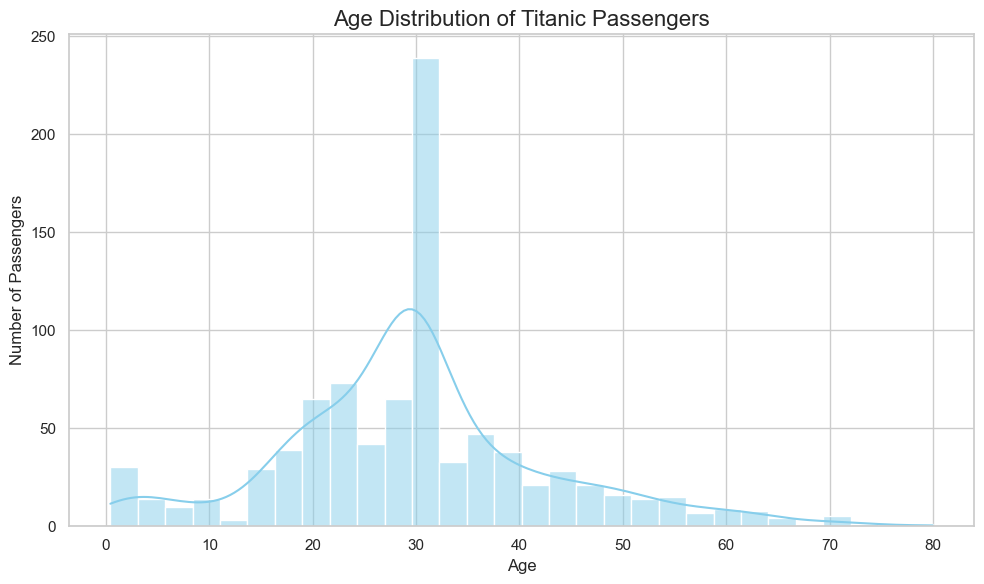

In [21]:
 #Age Distribution: Visualize the distribution of passenger ages.

# Set the visual style
sns.set(style="whitegrid")

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

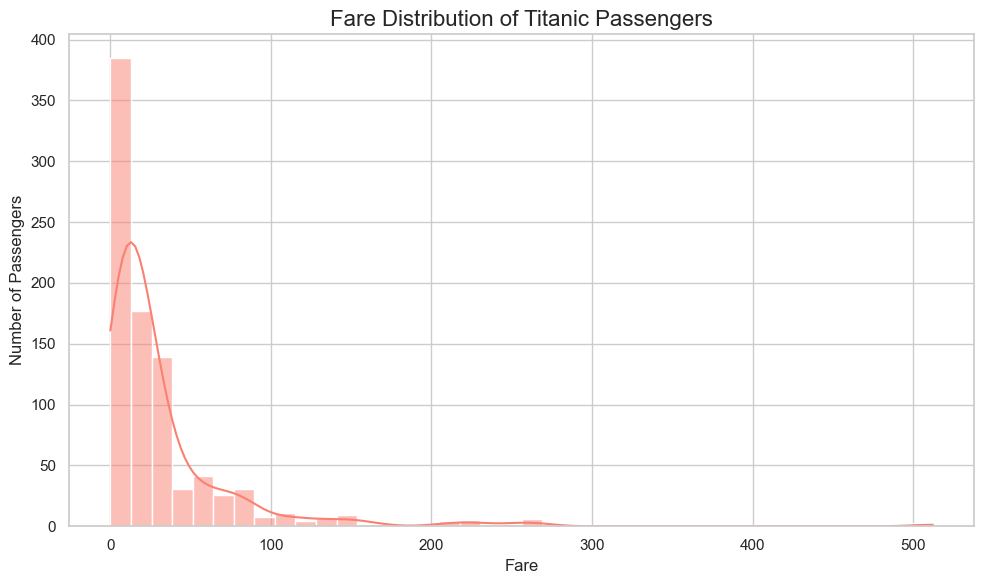

In [22]:
# Fare Distribution: Visualize the distribution of fares.

# Set the visual style
sns.set(style="whitegrid")

# Plot the fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), kde=True, bins=40, color='salmon')
plt.title('Fare Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

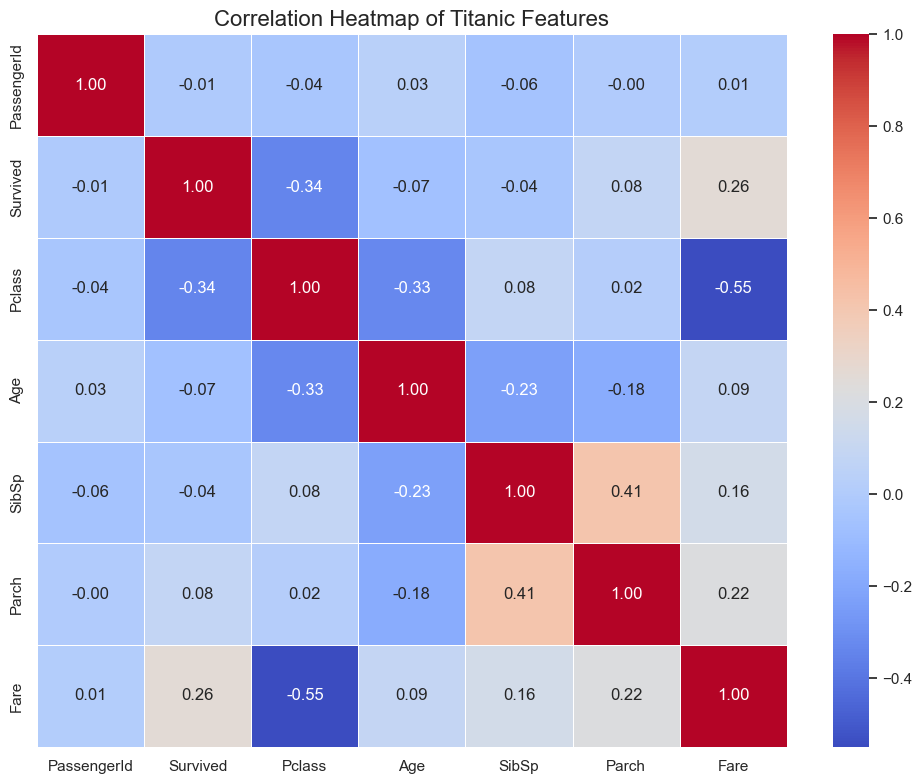

In [23]:
#Correlation Analysis: Create a heatmap to visualize the correlation between features.

# Calculate the correlation matrix (numerical features only)
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Features', fontsize=16)
plt.tight_layout()
plt.show()